# **Shopee Email Marketing Analysis**

**Table of Contents**

* [Introduction](#section_1)
  * [Background Information](#section_1_a)
  * [Problem Statement](#section_1_b)
* [Data Preparation & Cleaning](#section_2)
  * [Import dataset](#section_2_a)
  * [Check missing values](#section_2_b)
  * [Check duplicate data](#section_2_c)
  * [Check typos](#section_2_d)
  * [Check data type](#section_2_e)
  * [Cross-field validation](#section_2_f)
  * [Encoding & variable transformation](#section_2_g)
  * [Check outliers](#section_2_h)
  * [Separating the data](#section_2_i)
* [Analysis](#section_3)
  * [Correlation Analysis](#section_3_a)
  * [Classification - Logistic Regression](#section_3_b)
  * [Save Result for Visualization](#section_3_c)

<a name='section_1'></a>
## **Introduction**

<a name='section_1_a'></a>
### **Background Information**

Data Sea Group Financial Report: https://www.sea.com/investor/quarterlyresults 

In the last 2 years (2018-2019), **Shopee has not been able to become a profitable business.** From quarter to quarter, the total Cost & Expenses always exceeds the Revenue value, resulting in **Operational Loss.**
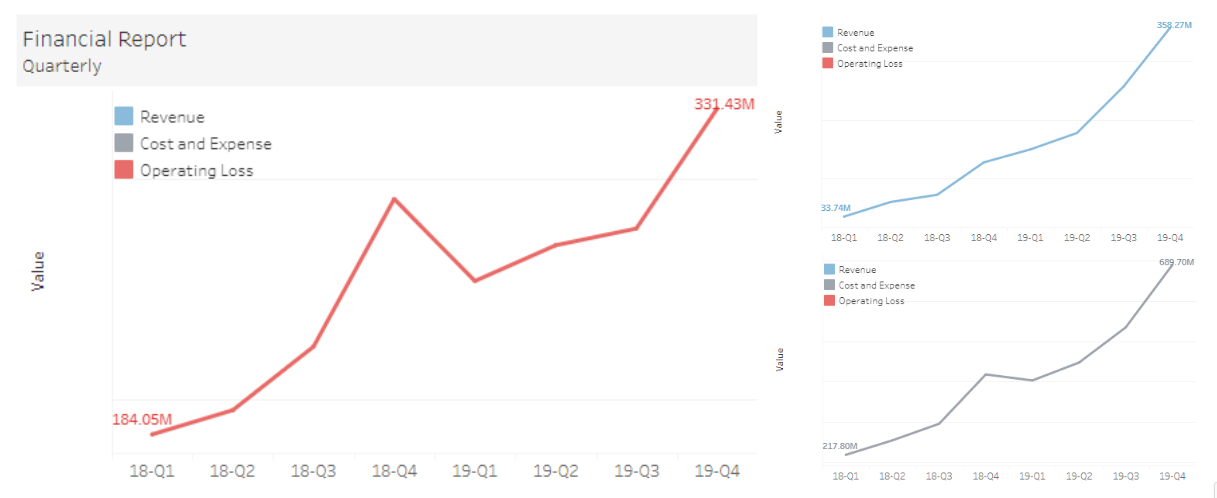

One of the biggest Shopee's Expense is on **Sales and Marketing (Top 2 Highest Expense).**
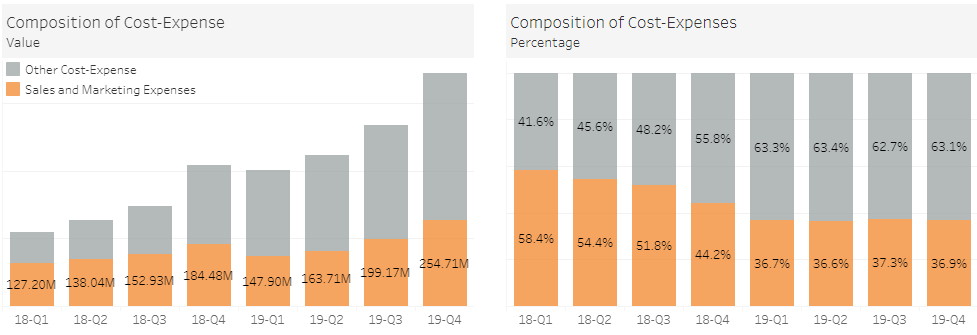

<a name='section_1_b'></a>
### **Problem Statement**

With the given dataset: https://www.kaggle.com/competitions/student-shopee-code-league-marketing-analytics/data 

* The marketing team is curious about **how the email-marketing campaign is performing with our current budget.** 

* We were asked to investigate **the best budget allocation strategy for an email marketing campaign** (get maximum profit).

<a name='section_2'></a>
## **Data Preparation & Cleaning**

In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<a name='section_2_a'></a>
### **Import dataset**

**Train Dataset**: our analysis will focus in this dataset (build the model and evaluate its performance)

In [2]:
url_train = 'https://drive.google.com/file/d/1kBlHZe-weoyS-VwTQhuRzxCZo8vHz3rh/view?usp=sharing'
url_train = 'https://drive.google.com/uc?id=' + url_train.split('/')[-2]
df_train = pd.read_csv(url_train)
df_train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,user_id_1,attr_1,attr_2,attr_3,age,domain
0,3,2019-07-15 16:00:00 UTC,66016,31,7,1,1,1,2,4,...,8,21,0,1203,66016,1.0,1.0,2,36.0,@gmail.com
1,5,2019-07-15 16:00:00 UTC,3987,32,7,1,1,4,11,24,...,16,23,1,79,3987,1.0,1.0,2,29.0,@gmail.com
2,5,2019-07-15 16:00:00 UTC,23749,32,13,1,2,0,0,0,...,15,26,0,404,23749,NaN,1.0,0,NaN,@gmail.com
3,3,2019-07-15 16:00:00 UTC,92045,33,Never open,1,1,0,0,0,...,12,30,1,1773,92045,1.0,1.0,1,35.0,@gmail.com
4,3,2019-07-15 16:00:00 UTC,29466,36,60,1,13,0,0,0,...,18,23,0,511,29466,1.0,1.0,2,26.0,@gmail.com


**Test Dataset**: as a benchmark and to test our model. Unfortunately there's no open_flag variable in this dataset (we don't know whether the user open the email or not)

In [3]:
url_test = 'https://drive.google.com/file/d/1OgMbf_usVPn6y8nykPk13TwNAJWX3N8m/view?usp=sharing'
url_test = 'https://drive.google.com/uc?id=' + url_test.split('/')[-2]
df_test = pd.read_csv(url_test)
df_test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,user_id_1,attr_1,attr_2,attr_3,age,domain
0,5,2019-09-02 16:00:00 UTC,779,23,6,1,1,0,0,0,...,2,7,12,29,779,NaN,1.0,0,NaN,@gmail.com
1,5,2019-09-02 16:00:00 UTC,1901,23,20,1,1,0,0,0,...,1,5,11,59,1901,1.0,1.0,4,50.0,@gmail.com
2,5,2019-09-02 16:00:00 UTC,2503,23,11,2,1,0,6,11,...,5,7,15,79,2503,NaN,1.0,0,NaN,@gmail.com
3,5,2019-09-02 16:00:00 UTC,3236,23,6,1,1,0,1,3,...,3,5,8,101,3236,1.0,1.0,2,29.0,@yahoo.com
4,5,2019-09-02 16:00:00 UTC,3355,23,5,1,1,0,0,0,...,1,1,3,110,3355,1.0,1.0,2,28.0,@gmail.com


In [4]:
print(df_train.info(), "\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

<a name='section_2_b'></a>
### **Check missing values**

In [5]:
print("Out of", len(df_train), "data, the number of missing values for each columns are")
df_train.isnull().sum()

Out of 73539 data, the number of missing values for each columns are


country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
open_flag                          0
row_id                             0
user_id_1                          0
attr_1                         28192
attr_2                           279
attr_3                             0
age                            28192
domain                             0
dtype: int64

In [6]:
print("Out of", len(df_test), "data, the number of missing values for each columns are")
df_test.isnull().sum()

Out of 55970 data, the number of missing values for each columns are


country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
row_id                             0
user_id_1                          0
attr_1                         21233
attr_2                           168
attr_3                             0
age                            21233
domain                             0
dtype: int64

Seeing results above, there are some missing values in the data. Thus, we decided to:

* **Drop** 2 columns: **attr_1** & **age** (too many missing information)
* **Drop** 2 useless columns: **user_id_1** & **row_id**
* **Fill missing values** in **attr_2** with its median value 

In [7]:
df_train.drop(columns=['attr_1', 'age', 'user_id_1', 'row_id'], inplace=True)
df_test.drop(columns=['attr_1', 'age', 'user_id_1', 'row_id'], inplace=True)
df_train['attr_2'].fillna(df_train['attr_2'].median(), inplace=True)
df_test['attr_2'].fillna(df_test['attr_2'].median(), inplace=True)
print(df_train.info(), "\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

<a name='section_2_c'></a>
### **Check duplicate data**

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_test.duplicated().sum()

0

No duplicate data

<a name='section_2_d'></a>
### **Check typos**

In [10]:
df_train[['domain']].drop_duplicates()

,domain
0,@gmail.com
12,other
14,@icloud.com
17,@yahoo.com
26,@outlook.com
27,@hotmail.com
55,@ymail.com
308,@live.com
518,@163.com
538,@qq.com


In [11]:
df_test[['domain']].drop_duplicates()

,domain
0,@gmail.com
3,@yahoo.com
53,@hotmail.com
66,other
260,@icloud.com
498,@qq.com
722,@live.com
768,@rocketmail.com
1074,@ymail.com
1943,@163.com


There isn't any typos in domain column

In [12]:
df_train[['grass_date']].drop_duplicates()

,grass_date
0,2019-07-15 16:00:00 UTC
2390,2019-07-16 16:00:00 UTC
3793,2019-07-17 16:00:00 UTC
4621,2019-07-18 16:00:00 UTC
6158,2019-07-19 16:00:00 UTC
6897,2019-07-20 16:00:00 UTC
8020,2019-07-21 16:00:00 UTC
9700,2019-07-22 16:00:00 UTC
12169,2019-07-23 16:00:00 UTC
13397,2019-07-24 16:00:00 UTC


In [13]:
df_test[['grass_date']].drop_duplicates()

,grass_date
0,2019-09-02 16:00:00 UTC
3355,2019-09-03 16:00:00 UTC
5859,2019-09-04 16:00:00 UTC
8787,2019-09-05 16:00:00 UTC
12642,2019-09-06 16:00:00 UTC
15858,2019-09-07 16:00:00 UTC
19311,2019-09-08 16:00:00 UTC
27345,2019-09-09 16:00:00 UTC
30220,2019-09-10 16:00:00 UTC
32352,2019-09-11 16:00:00 UTC


There isn't any typos in grass_date column

* Train data: from July 15th 2019 to September 1st 2019
* Test data: from September 2nd 2019 to September 28th 2019

<a name='section_2_e'></a>
### **Check data type**

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

#### Changing grass_date to datetime format

In [15]:
df_train['grass_date'] = pd.to_datetime(df_train['grass_date'])
df_train[['grass_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   grass_date  73539 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 574.6 KB


In [16]:
df_test['grass_date'] = pd.to_datetime(df_test['grass_date'])
df_test[['grass_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   grass_date  55970 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 437.4 KB


#### Changing 3 last activity columns to integer format (number) 
Activity: open, login, and checkout

There are **string values ("Never ...")** in **last_open_day, last_login_day, last_checkout_day.** We will replace those string into number values that's large enough to represent that the user never do the activity. 

Number of user who never open email          = 7518 user
Number of user who never login to Shopee     = 279 user
Number of user who never checkout in Shopee  = 16905 user
Number of user who never open/login/checkout = 21127 user
Total number of data = 73539

Max value of last_open_day     = 808 days
Max value of last_login_day    = 18141 days
Max value of last_checkout_day = 1445 days



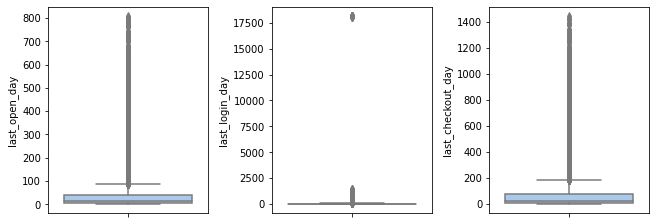

In [17]:
C1 = df_train['last_open_day']=='Never open'
C2 = df_train['last_login_day']=='Never login'
C3 = df_train['last_checkout_day']=='Never checkout'
C = C1 | C2 | C3
print("Number of user who never open email          =", C1.sum(), "user")
print("Number of user who never login to Shopee     =", C2.sum(), "user")
print("Number of user who never checkout in Shopee  =", C3.sum(), "user")
print("Number of user who never open/login/checkout =", C.sum(), "user")
print("Total number of data =", len(df_train))

D1 = pd.to_numeric(df_train[~C1]['last_open_day'])
D2 = pd.to_numeric(df_train[~C2]['last_login_day'])
D3 = pd.to_numeric(df_train[~C3]['last_checkout_day'])
print("\nMax value of last_open_day     =", D1.max(), "days")
print("Max value of last_login_day    =", D2.max(), "days")
print("Max value of last_checkout_day =", D3.max(), "days\n")
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9,3), constrained_layout=True)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=D1, ax=axs[0])
sns.boxplot(y=D2, ax=axs[1])
sns.boxplot(y=D3, ax=axs[2])

Number of user who never open email          = 7589 user
Number of user who never login to Shopee     = 169 user
Number of user who never checkout in Shopee  = 11403 user
Number of user who never open/login/checkout = 16089 user
Total number of data = 55970

Max value of last_open_day     = 812 days
Max value of last_login_day    = 18165 days
Max value of last_checkout_day = 1462 days



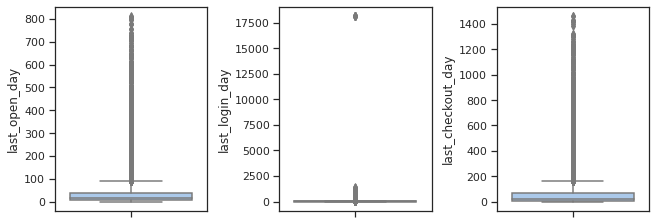

In [18]:
C1 = df_test['last_open_day']=='Never open'
C2 = df_test['last_login_day']=='Never login'
C3 = df_test['last_checkout_day']=='Never checkout'
C = C1 | C2 | C3
print("Number of user who never open email          =", C1.sum(), "user")
print("Number of user who never login to Shopee     =", C2.sum(), "user")
print("Number of user who never checkout in Shopee  =", C3.sum(), "user")
print("Number of user who never open/login/checkout =", C.sum(), "user")
print("Total number of data =", len(df_test))

D1 = pd.to_numeric(df_test[~C1]['last_open_day'])
D2 = pd.to_numeric(df_test[~C2]['last_login_day'])
D3 = pd.to_numeric(df_test[~C3]['last_checkout_day'])
print("\nMax value of last_open_day     =", D1.max(), "days")
print("Max value of last_login_day    =", D2.max(), "days")
print("Max value of last_checkout_day =", D3.max(), "days\n")
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9,3), constrained_layout=True)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=D1, ax=axs[0])
sns.boxplot(y=D2, ax=axs[1])
sns.boxplot(y=D3, ax=axs[2])

In [19]:
df_train['last_open_day'].replace('Never open', '899', inplace=True)
df_train['last_login_day'].replace('Never login', '18999', inplace=True)
df_train['last_checkout_day'].replace('Never checkout', '1499', inplace=True)
col_last = ['last_open_day', 'last_login_day', 'last_checkout_day']
df_train[col_last] = df_train[col_last].apply(pd.to_numeric)

df_test['last_open_day'].replace('Never open', '899', inplace=True)
df_test['last_login_day'].replace('Never login', '18999', inplace=True)
df_test['last_checkout_day'].replace('Never checkout', '1499', inplace=True)
df_test[col_last] = df_test[col_last].apply(pd.to_numeric)

In [20]:
df_train[['last_open_day', 'last_login_day', 'last_checkout_day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   last_open_day      73539 non-null  int64
 1   last_login_day     73539 non-null  int64
 2   last_checkout_day  73539 non-null  int64
dtypes: int64(3)
memory usage: 1.7 MB


In [21]:
df_test[['last_open_day', 'last_login_day', 'last_checkout_day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   last_open_day      55970 non-null  int64
 1   last_login_day     55970 non-null  int64
 2   last_checkout_day  55970 non-null  int64
dtypes: int64(3)
memory usage: 1.3 MB


<a name='section_2_f'></a>
### **Cross-field validation**

Train Data

In [22]:
valid_1 = (df_train['last_open_day'] <=10) & (df_train['open_count_last_10_days'] > 0)
valid_2 = (df_train['last_open_day'] <=30) & (df_train['open_count_last_30_days'] > 0)
valid_3 = (df_train['last_open_day'] <=60) & (df_train['open_count_last_60_days'] > 0)
valid_4 = (df_train['open_count_last_10_days'] == 0) & (df_train['last_open_day'] > 10)
valid_5 = (df_train['open_count_last_30_days'] == 0) & (df_train['last_open_day'] > 30)
valid_6 = (df_train['open_count_last_60_days'] == 0) & (df_train['last_open_day'] > 60)
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_open = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_open.sum(), "invalid open data from", len(df_train), "data")

valid_1 = (df_train['last_login_day'] <=10) & (df_train['login_count_last_10_days'] > 0) 
valid_2 = (df_train['last_login_day'] <=30) & (df_train['login_count_last_30_days'] > 0)
valid_3 = (df_train['last_login_day'] <=60) & (df_train['login_count_last_60_days'] > 0)
valid_4 = (df_train['login_count_last_10_days'] == 0) & (df_train['last_login_day'] > 10) 
valid_5 = (df_train['login_count_last_30_days'] == 0) & (df_train['last_login_day'] > 30) 
valid_6 = (df_train['login_count_last_60_days'] == 0) & (df_train['last_login_day'] > 60)
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_login = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_login.sum(), "invalid login data from", len(df_train), "data")

valid_1 = (df_train['last_checkout_day'] <=10) & (df_train['checkout_count_last_10_days'] > 0) 
valid_2 = (df_train['last_checkout_day'] <=30) & (df_train['checkout_count_last_30_days'] > 0)
valid_3 = (df_train['last_checkout_day'] <=60) & (df_train['checkout_count_last_60_days'] > 0)
valid_4 = (df_train['checkout_count_last_10_days'] == 0) & (df_train['last_checkout_day'] > 10) 
valid_5 = (df_train['checkout_count_last_30_days'] == 0) & (df_train['last_checkout_day'] > 30) 
valid_6 = (df_train['checkout_count_last_60_days'] == 0) & (df_train['last_checkout_day'] > 60) 
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_checkout = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_checkout.sum(), "invalid checkout data from", len(df_train), "data")

invalid_total = invalid_open | invalid_login | invalid_checkout
print("Total invalid data =", invalid_total.sum())
df_train_clean = df_train[~invalid_total]

There are 12069 invalid open data from 73539 data
There are 9514 invalid login data from 73539 data
There are 4895 invalid checkout data from 73539 data
Total invalid data = 23254


Test Data

In [23]:
valid_1 = (df_test['last_open_day'] <=10) & (df_test['open_count_last_10_days'] > 0) 
valid_2 = (df_test['last_open_day'] <=30) & (df_test['open_count_last_30_days'] > 0) 
valid_3 = (df_test['last_open_day'] <=60) & (df_test['open_count_last_60_days'] > 0) 
valid_4 = (df_test['open_count_last_10_days'] == 0) & (df_test['last_open_day'] > 10) 
valid_5 = (df_test['open_count_last_30_days'] == 0) & (df_test['last_open_day'] > 30)
valid_6 = (df_test['open_count_last_60_days'] == 0) & (df_test['last_open_day'] > 60) 
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_open = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_open.sum(), "invalid open data from", len(df_test), "data")

valid_1 = (df_test['last_login_day'] <=10) & (df_test['login_count_last_10_days'] > 0) 
valid_2 = (df_test['last_login_day'] <=30) & (df_test['login_count_last_30_days'] > 0) 
valid_3 = (df_test['last_login_day'] <=60) & (df_test['login_count_last_60_days'] > 0) 
valid_4 = (df_test['login_count_last_10_days'] == 0) & (df_test['last_login_day'] > 10) 
valid_5 = (df_test['login_count_last_30_days'] == 0) & (df_test['last_login_day'] > 30) 
valid_6 = (df_test['login_count_last_60_days'] == 0) & (df_test['last_login_day'] > 60) 
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_login = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_login.sum(), "invalid login data from", len(df_test), "data")

valid_1 = (df_test['last_checkout_day'] <=10) & (df_test['checkout_count_last_10_days'] > 0) 
valid_2 = (df_test['last_checkout_day'] <=30) & (df_test['checkout_count_last_30_days'] > 0) 
valid_3 = (df_test['last_checkout_day'] <=60) & (df_test['checkout_count_last_60_days'] > 0) 
valid_4 = (df_test['checkout_count_last_10_days'] == 0) & (df_test['last_checkout_day'] > 10) 
valid_5 = (df_test['checkout_count_last_30_days'] == 0) & (df_test['last_checkout_day'] > 30) 
valid_6 = (df_test['checkout_count_last_60_days'] == 0) & (df_test['last_checkout_day'] > 60) 
invalid_1 = ~(valid_1 | valid_4)
invalid_2 = ~(valid_2 | valid_5)
invalid_3 = ~(valid_3 | valid_6)
invalid_checkout = invalid_1 | invalid_2 | invalid_3
print("There are", invalid_checkout.sum(), "invalid checkout data from", len(df_test), "data")

invalid_total = invalid_open | invalid_login | invalid_checkout
print("Total invalid data =", invalid_total.sum())
df_test_clean = df_test[~invalid_total]

There are 10095 invalid open data from 55970 data
There are 7805 invalid login data from 55970 data
There are 3769 invalid checkout data from 55970 data
Total invalid data = 18899


<a name='section_2_g'></a>
### **Encoding and variable transformation**

In [24]:
is_last_open = pd.DataFrame([])
pre_name = 'isLast_open_'
iter = range(30, 370, 30)
for i in iter:
  if (i==30):
    name = pre_name + str(i-30) + '_to_' + str(i)
    is_last_open[name] = ((df_train_clean['last_open_day'] <= i) & (df_train_clean['last_open_day'] >= i-30))*1
  else:
    name = pre_name + str(i-29) + '_to_' + str(i)
    is_last_open[name] = ((df_train_clean['last_open_day'] <= i) & (df_train_clean['last_open_day'] > i-30))*1
is_last_open['isLast_open_more_360'] = (df_train_clean['last_open_day'] > 360)*1
is_last_open.head()

,isLast_open_0_to_30,isLast_open_31_to_60,isLast_open_61_to_90,isLast_open_91_to_120,isLast_open_121_to_150,isLast_open_151_to_180,isLast_open_181_to_210,isLast_open_211_to_240,isLast_open_241_to_270,isLast_open_271_to_300,isLast_open_301_to_330,isLast_open_331_to_360,isLast_open_more_360
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
is_last_login = pd.DataFrame([])
pre_name = 'isLast_login_'
iter = range(30, 370, 30)
for i in iter:
  if (i==30):
    name = pre_name + str(i-30) + '_to_' + str(i)
    is_last_login[name] = ((df_train_clean['last_login_day'] <= i) & (df_train_clean['last_login_day'] >= i-30))*1
  else:
    name = pre_name + str(i-29) + '_to_' + str(i)
    is_last_login[name] = ((df_train_clean['last_login_day'] <= i) & (df_train_clean['last_login_day'] > i-30))*1
is_last_login['isLast_login_more_360'] = (df_train_clean['last_login_day'] > 360)*1
is_last_login.head()

,isLast_login_0_to_30,isLast_login_31_to_60,isLast_login_61_to_90,isLast_login_91_to_120,isLast_login_121_to_150,isLast_login_151_to_180,isLast_login_181_to_210,isLast_login_211_to_240,isLast_login_241_to_270,isLast_login_271_to_300,isLast_login_301_to_330,isLast_login_331_to_360,isLast_login_more_360
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
is_last_checkout = pd.DataFrame([])
pre_name = 'isLast_checkout_'
iter = range(30, 370, 30)
for i in iter:
  if (i==30):
    name = pre_name + str(i-30) + '_to_' + str(i)
    is_last_checkout[name] = ((df_train_clean['last_checkout_day'] <= i) & (df_train_clean['last_checkout_day'] >= i-30))*1
  else:
    name = pre_name + str(i-29) + '_to_' + str(i)
    is_last_checkout[name] = ((df_train_clean['last_checkout_day'] <= i) & (df_train_clean['last_checkout_day'] > i-30))*1
is_last_checkout['isLast_checkout_more_360'] = (df_train_clean['last_checkout_day'] > 360)*1
is_last_checkout.head()

,isLast_checkout_0_to_30,isLast_checkout_31_to_60,isLast_checkout_61_to_90,isLast_checkout_91_to_120,isLast_checkout_121_to_150,isLast_checkout_151_to_180,isLast_checkout_181_to_210,isLast_checkout_211_to_240,isLast_checkout_241_to_270,isLast_checkout_271_to_300,isLast_checkout_301_to_330,isLast_checkout_331_to_360,isLast_checkout_more_360
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_train_clean['domain'] = df_train_clean['domain'].str.replace('@', '')
df_train_clean['domain'] = df_train_clean['domain'].str.replace('.com', '')
df_train_clean['day_send'] = df_train_clean['grass_date'].dt.dayofweek + 1
df_test_clean['domain'] = df_test_clean['domain'].str.replace('@', '')
df_test_clean['domain'] = df_test_clean['domain'].str.replace('.com', '')
df_test_clean['day_send'] = df_test_clean['grass_date'].dt.dayofweek + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWar

In [28]:
df_domain = df_train_clean['domain'].copy()
df_domain = pd.get_dummies(df_domain, prefix='domain')
df_domain.head()

,domain_163,domain_gmail,domain_hotmail,domain_icloud,domain_live,domain_other,domain_outlook,domain_qq,domain_rocketmail,domain_yahoo,domain_ymail
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0


<a name='section_2_h'></a>
### **Check outliers**

Train Data

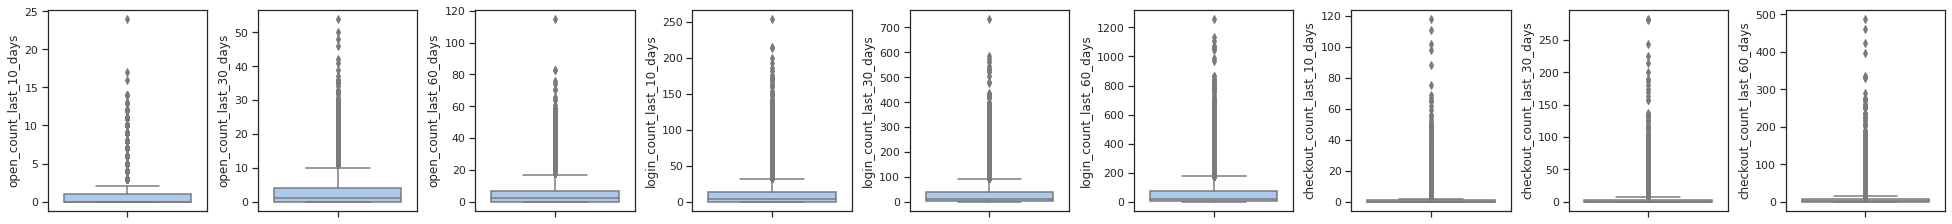

In [34]:
col_outlier = df_train_clean.iloc[:,7:16].columns.tolist()
nr = 1
nc = 9
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(27,3), constrained_layout=True)
sns.set_theme(style="ticks", palette="pastel")
for i,c in enumerate(col_outlier):
  sns.boxplot(y=c, data=df_train_clean, ax=axs[i])

In [29]:
col_outlier = df_train_clean.iloc[:,7:16].columns.tolist()
limit_up = []
for c in col_outlier:
  IQR = df_train_clean[c].quantile(0.75) - df_train_clean[c].quantile(0.25)
  lu = df_train_clean[c].quantile(0.75) + 1.5*IQR
  limit_up.append(lu)
  print("In column", c, "the upper limit for outlier (Q3+1.5*IQR) =", lu)

print("\nFrom total of", len(df_train_clean), "data")
cond_outlier = df_train_clean['open_flag']<0
for i,c in enumerate(col_outlier):
  n_outlier = (df_train_clean[c] > limit_up[i]).sum()
  cond_outlier = cond_outlier | (df_train_clean[c] > limit_up[i])
  print("Number of outliers in column", c, "is =", n_outlier)
print("Total outliers =", cond_outlier.sum(), "\n")

In column open_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 2.5
In column open_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 10.0
In column open_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 17.5
In column login_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 32.5
In column login_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 93.5
In column login_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 177.0
In column checkout_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 2.5
In column checkout_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 7.5
In column checkout_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 15.0

From total of 50285 data
Number of outliers in column open_count_last_10_days is = 7293
Number of outliers in column open_count_last_30_days is = 4010
Number of outliers in column open_count_last_60_days is = 4302
Number of outliers in column login

Test Data

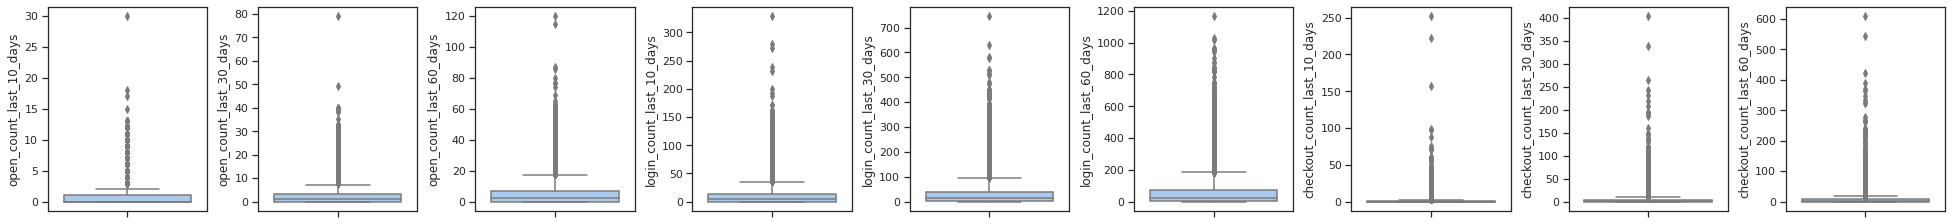

In [35]:
col_outlier = df_test_clean.iloc[:,7:16].columns.tolist()
nr = 1
nc = 9
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(27,3), constrained_layout=True)
sns.set_theme(style="ticks", palette="pastel")
for i,c in enumerate(col_outlier):
  sns.boxplot(y=c, data=df_test_clean, ax=axs[i])

In [31]:
col_outlier = df_test_clean.iloc[:,7:16].columns.tolist()
limit_up = []
for c in col_outlier:
  IQR = df_test_clean[c].quantile(0.75) - df_test_clean[c].quantile(0.25)
  lu = df_test_clean[c].quantile(0.75) + 1.5*IQR
  limit_up.append(lu)
  print("In column", c, "the upper limit for outlier (Q3+1.5*IQR) =", lu)

print("\nFrom total of", len(df_test_clean), "data")
cond_outlier = df_test_clean['open_count_last_10_days']<0
for i,c in enumerate(col_outlier):
  n_outlier = (df_test_clean[c] > limit_up[i]).sum()
  cond_outlier = cond_outlier | (df_test_clean[c] > limit_up[i])
  print("Number of outliers in column", c, "is =", n_outlier)
print("Total outliers =", cond_outlier.sum(), "\n")

In column open_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 2.5
In column open_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 7.5
In column open_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 17.5
In column login_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 35.0
In column login_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 96.0
In column login_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 183.0
In column checkout_count_last_10_days the upper limit for outlier (Q3+1.5*IQR) = 2.5
In column checkout_count_last_30_days the upper limit for outlier (Q3+1.5*IQR) = 10.0
In column checkout_count_last_60_days the upper limit for outlier (Q3+1.5*IQR) = 17.5

From total of 37071 data
Number of outliers in column open_count_last_10_days is = 4295
Number of outliers in column open_count_last_30_days is = 4139
Number of outliers in column open_count_last_60_days is = 3482
Number of outliers in column login

There are too many potential outliers both in Train Data and Test Data for each features (columns) above. **We think that this potential outliers represent the real condition** that there are indeed some users who behave differently from most users (normal) because we find this case in both datasets (Train and Test). Therefore, **we decided not to discard these outliers** and instead it became a challenge for us to analyze them.

<a name='section_2_i'></a>
### **Separating the data**

We separate the data into 4 categories (3 activities & 1 user information) in order to simplify the correlation analysis.

In [36]:
col_user = [0,20,3,17,18]
df_user = pd.concat([df_train_clean.iloc[:,col_user], df_domain, df_train_clean.iloc[:,16] ], axis=1)
df_user.head()

,country_code,day_send,subject_line_length,attr_2,attr_3,domain_163,domain_gmail,domain_hotmail,domain_icloud,domain_live,domain_other,domain_outlook,domain_qq,domain_rocketmail,domain_yahoo,domain_ymail,open_flag
0,3,1,31,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0
1,5,1,32,1.0,2,0,1,0,0,0,0,0,0,0,0,0,1
3,3,1,33,1.0,1,0,1,0,0,0,0,0,0,0,0,0,1
5,3,1,36,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0
7,1,1,38,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
col_open = [7,8,9]
df_open = pd.concat([df_train_clean.iloc[:,col_open], is_last_open, df_train_clean.iloc[:,16] ], axis=1)
df_open.head()

,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,isLast_open_0_to_30,isLast_open_31_to_60,isLast_open_61_to_90,isLast_open_91_to_120,isLast_open_121_to_150,isLast_open_151_to_180,isLast_open_181_to_210,isLast_open_211_to_240,isLast_open_241_to_270,isLast_open_271_to_300,isLast_open_301_to_330,isLast_open_331_to_360,isLast_open_more_360,open_flag
0,1,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,11,24,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
col_login = [10,11,12]
df_login = pd.concat([df_train_clean.iloc[:,col_login], is_last_login, df_train_clean.iloc[:,16] ], axis=1)
df_login.head()

,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,isLast_login_0_to_30,isLast_login_31_to_60,isLast_login_61_to_90,isLast_login_91_to_120,isLast_login_121_to_150,isLast_login_151_to_180,isLast_login_181_to_210,isLast_login_211_to_240,isLast_login_241_to_270,isLast_login_271_to_300,isLast_login_301_to_330,isLast_login_331_to_360,isLast_login_more_360,open_flag
0,1,11,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23,79,136,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,96,292,598,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,29,85,143,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,47,102,322,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
col_checkout = [13,14,15]
df_checkout = pd.concat([df_train_clean.iloc[:,col_checkout], is_last_checkout, df_train_clean.iloc[:,16] ], axis=1)
df_checkout.head()

,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,isLast_checkout_0_to_30,isLast_checkout_31_to_60,isLast_checkout_61_to_90,isLast_checkout_91_to_120,isLast_checkout_121_to_150,isLast_checkout_151_to_180,isLast_checkout_181_to_210,isLast_checkout_211_to_240,isLast_checkout_241_to_270,isLast_checkout_271_to_300,isLast_checkout_301_to_330,isLast_checkout_331_to_360,isLast_checkout_more_360,open_flag
0,1,8,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,16,23,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,12,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2,11,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,17,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<a name='section_3'></a>
## **Analysis**

<a name='section_3_a'></a>
### **Correlation Analysis**

**The correlation analysis is done to select important features** (eliminate insignificant ones) that determine whether user open our email campaign or not.

#### **User-email data**

In [40]:
col_X = df_user.columns.tolist()[:-1]
col_sig = []
for i, c in enumerate(col_X):
  (r, p_value) = stats.pearsonr(df_user[c], df_user['open_flag'])
  if p_value<0.05:
    word = "Significant"
    col_sig.append(i)
  else:
    word = ""
  print("Kolom ke", i, ":\tr =",round(r,4), "\tp-value =", round(p_value,4), "  \t", word)

Kolom ke 0 :	r = 0.1718 	p-value = 0.0   	 Significant
Kolom ke 1 :	r = -0.0101 	p-value = 0.0232   	 Significant
Kolom ke 2 :	r = -0.0709 	p-value = 0.0   	 Significant
Kolom ke 3 :	r = 0.0004 	p-value = 0.9311   	 
Kolom ke 4 :	r = -0.0054 	p-value = 0.2229   	 
Kolom ke 5 :	r = 0.0023 	p-value = 0.5989   	 
Kolom ke 6 :	r = -0.0993 	p-value = 0.0   	 Significant
Kolom ke 7 :	r = 0.0899 	p-value = 0.0   	 Significant
Kolom ke 8 :	r = 0.0286 	p-value = 0.0   	 Significant
Kolom ke 9 :	r = 0.0143 	p-value = 0.0013   	 Significant
Kolom ke 10 :	r = 0.0578 	p-value = 0.0   	 Significant
Kolom ke 11 :	r = 0.0071 	p-value = 0.1095   	 
Kolom ke 12 :	r = 0.0164 	p-value = 0.0002   	 Significant
Kolom ke 13 :	r = 0.002 	p-value = 0.6588   	 
Kolom ke 14 :	r = 0.0202 	p-value = 0.0   	 Significant
Kolom ke 15 :	r = 0.0025 	p-value = 0.5707   	 


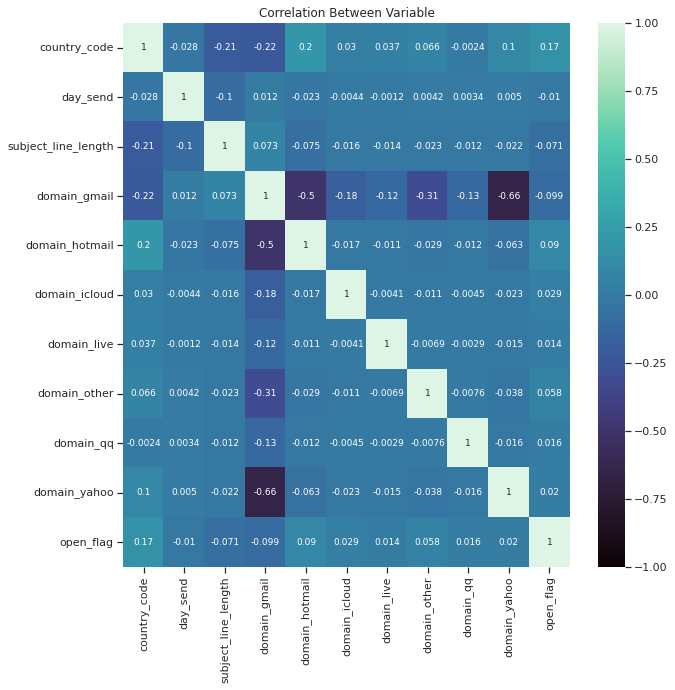

In [41]:
Xy = df_user.iloc[:,col_sig+[16]]
corr_user = Xy.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')
sns.heatmap(corr_user, annot=True, vmin=-1, vmax=1, cmap='mako', annot_kws={"fontsize":9})
plt.show()

In [42]:
Xy.drop(columns=['domain_yahoo', 'domain_hotmail'], inplace=True)
X = Xy.iloc[:,:-1]
y = Xy.iloc[:,-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
user_summary = []
col_X = X.columns.tolist()
for c in col_X:
  (r, p_value) = stats.pearsonr(X[c], y)
  user_summary.append([c, round(r,3), round(p_value,3)])
user_summary = pd.DataFrame(user_summary, columns=['column', 'correlation', 'pvalue'])
user_summary

,column,correlation,pvalue
0,country_code,0.172,0.000
1,day_send,-0.010,0.023
2,subject_line_length,-0.071,0.000
3,domain_gmail,-0.099,0.000
4,domain_icloud,0.029,0.000
5,domain_live,0.014,0.001
6,domain_other,0.058,0.000
7,domain_qq,0.016,0.000


We found **8 important features** about user information.

#### **Open data**

In [44]:
col_X = df_open.columns.tolist()[:-1]
col_sig = []
for i, c in enumerate(col_X):
  (r, p_value) = stats.pearsonr(df_open[c], df_open['open_flag'])
  if p_value<0.05:
    word = "Significant"
    col_sig.append(i)
  else:
    word = ""
  print("Kolom ke", i, ":\tr =",round(r,4), "\tp-value =", round(p_value,4), "  \t", word)

Kolom ke 0 :	r = 0.5247 	p-value = 0.0   	 Significant
Kolom ke 1 :	r = 0.5195 	p-value = 0.0   	 Significant
Kolom ke 2 :	r = 0.49 	p-value = 0.0   	 Significant
Kolom ke 3 :	r = 0.2695 	p-value = 0.0   	 Significant
Kolom ke 4 :	r = -0.1199 	p-value = 0.0   	 Significant
Kolom ke 5 :	r = -0.1104 	p-value = 0.0   	 Significant
Kolom ke 6 :	r = -0.0507 	p-value = 0.0   	 Significant
Kolom ke 7 :	r = -0.0476 	p-value = 0.0   	 Significant
Kolom ke 8 :	r = -0.0336 	p-value = 0.0   	 Significant
Kolom ke 9 :	r = -0.021 	p-value = 0.0   	 Significant
Kolom ke 10 :	r = -0.0243 	p-value = 0.0   	 Significant
Kolom ke 11 :	r = -0.0246 	p-value = 0.0   	 Significant
Kolom ke 12 :	r = -0.0209 	p-value = 0.0   	 Significant
Kolom ke 13 :	r = -0.0204 	p-value = 0.0   	 Significant
Kolom ke 14 :	r = -0.0115 	p-value = 0.0101   	 Significant
Kolom ke 15 :	r = -0.1213 	p-value = 0.0   	 Significant


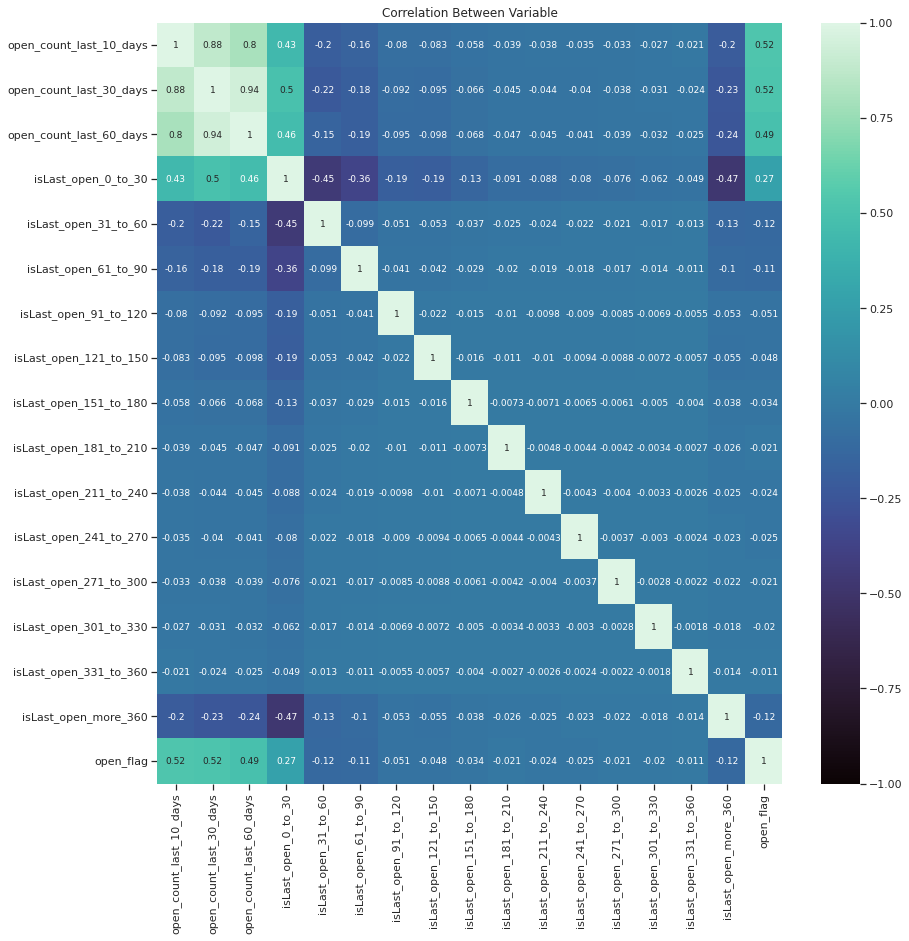

In [45]:
Xy = df_open.iloc[:,col_sig+[16]]
corr_user = Xy.corr()
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')
sns.heatmap(corr_user, annot=True, vmin=-1, vmax=1, cmap='mako', annot_kws={"fontsize":9})
plt.show()

In [46]:
Xy.drop(columns=['open_count_last_30_days', 'open_count_last_60_days', 'isLast_open_0_to_30'], inplace=True)
X = Xy.iloc[:,:-1]
y = Xy.iloc[:,-1]

In [47]:
open_summary = []
col_X = X.columns.tolist()
for c in col_X:
  (r, p_value) = stats.pearsonr(X[c], y)
  open_summary.append([c, round(r,3), round(p_value,3)])
open_summary = pd.DataFrame(open_summary, columns=['column', 'correlation', 'pvalue'])
open_summary

,column,correlation,pvalue
0,open_count_last_10_days,0.525,0.00
1,isLast_open_31_to_60,-0.120,0.00
2,isLast_open_61_to_90,-0.110,0.00
3,isLast_open_91_to_120,-0.051,0.00
4,isLast_open_121_to_150,-0.048,0.00
5,isLast_open_151_to_180,-0.034,0.00
6,isLast_open_181_to_210,-0.021,0.00
7,isLast_open_211_to_240,-0.024,0.00
8,isLast_open_241_to_270,-0.025,0.00
9,isLast_open_271_to_300,-0.021,0.00


We found **12 important features** about user open activity.

#### **Login data**

In [48]:
col_x = df_login.drop(['open_flag'],axis=1).columns.tolist()
column = []
for i,j in enumerate(col_x):
  (r, p_value) = stats.pearsonr(df_login[j], df_login['open_flag'])
  if p_value < 0.05:
    label = "Significant"
    column.append(i)
  else:
    label = ""
  print("Kolom ke", i, "\t=>\tr =",round(r,3), "\tp-value = ", round(p_value,3), " \t", label)

Kolom ke 0 	=>	r = 0.02 	p-value =  0.0  	 Significant
Kolom ke 1 	=>	r = 0.017 	p-value =  0.0  	 Significant
Kolom ke 2 	=>	r = 0.017 	p-value =  0.0  	 Significant
Kolom ke 3 	=>	r = 0.018 	p-value =  0.0  	 Significant
Kolom ke 4 	=>	r = -0.003 	p-value =  0.543  	 
Kolom ke 5 	=>	r = -0.008 	p-value =  0.092  	 
Kolom ke 6 	=>	r = -0.014 	p-value =  0.002  	 Significant
Kolom ke 7 	=>	r = -0.014 	p-value =  0.002  	 Significant
Kolom ke 8 	=>	r = -0.01 	p-value =  0.027  	 Significant
Kolom ke 9 	=>	r = -0.009 	p-value =  0.047  	 Significant
Kolom ke 10 	=>	r = 0.001 	p-value =  0.911  	 
Kolom ke 11 	=>	r = 0.007 	p-value =  0.112  	 
Kolom ke 12 	=>	r = 0.006 	p-value =  0.215  	 
Kolom ke 13 	=>	r = -0.002 	p-value =  0.709  	 
Kolom ke 14 	=>	r = 0.0 	p-value =  0.937  	 
Kolom ke 15 	=>	r = -0.004 	p-value =  0.347  	 


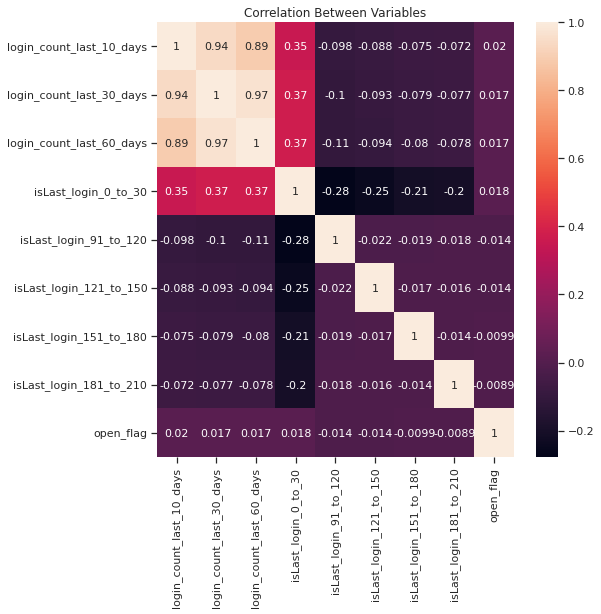

In [49]:
df_sig = df_login.iloc[:,column+[16]]
correlation = df_sig.corr(method = 'pearson')
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Correlation Between Variables')
sns.heatmap(correlation, annot=True, annot_kws={"fontsize":11})
plt.show()

In [50]:
df_sig=df_sig.drop(['login_count_last_30_days','login_count_last_60_days'],axis=1)
x = df_sig.drop(['open_flag'],axis=1)
y = df_sig['open_flag']
col_x_final = x.columns.tolist()
summary = []
for i in col_x_final:
  (r, p_value) = stats.pearsonr(x[i], y)
  summary.append([i,round(r,3),round(p_value,3)])
summary_login = pd.DataFrame(summary,columns=['column','correlation','pvalue'])
summary_login

,column,correlation,pvalue
0,login_count_last_10_days,0.020,0.000
1,isLast_login_0_to_30,0.018,0.000
2,isLast_login_91_to_120,-0.014,0.002
3,isLast_login_121_to_150,-0.014,0.002
4,isLast_login_151_to_180,-0.010,0.027
5,isLast_login_181_to_210,-0.009,0.047


We found **6 important features** about user login activity.

#### **Checkout data**

In [51]:
col_X = df_checkout.columns.tolist()[:-1]
col_sig = []
for i, c in enumerate(col_X):
  (r, p_value) = stats.pearsonr(df_checkout[c], df_checkout['open_flag'])
  if p_value<0.05:
    word = "Significant"
    col_sig.append(i)
  else:
    word = ""
  print("Kolom ke", i, ":\tr =",round(r,4), "\tp-value =", round(p_value,4), "  \t", word)

Kolom ke 0 :	r = 0.0174 	p-value = 0.0001   	 Significant
Kolom ke 1 :	r = 0.018 	p-value = 0.0001   	 Significant
Kolom ke 2 :	r = 0.0145 	p-value = 0.0012   	 Significant
Kolom ke 3 :	r = 0.0337 	p-value = 0.0   	 Significant
Kolom ke 4 :	r = 0.0075 	p-value = 0.0936   	 
Kolom ke 5 :	r = -0.003 	p-value = 0.5045   	 
Kolom ke 6 :	r = -0.0016 	p-value = 0.7194   	 
Kolom ke 7 :	r = 0.003 	p-value = 0.5053   	 
Kolom ke 8 :	r = -0.0052 	p-value = 0.2401   	 
Kolom ke 9 :	r = -0.0082 	p-value = 0.0656   	 
Kolom ke 10 :	r = -0.0064 	p-value = 0.1508   	 
Kolom ke 11 :	r = -0.0022 	p-value = 0.6209   	 
Kolom ke 12 :	r = 0.0122 	p-value = 0.0064   	 Significant
Kolom ke 13 :	r = -0.0001 	p-value = 0.9857   	 
Kolom ke 14 :	r = -0.0053 	p-value = 0.2387   	 
Kolom ke 15 :	r = -0.037 	p-value = 0.0   	 Significant


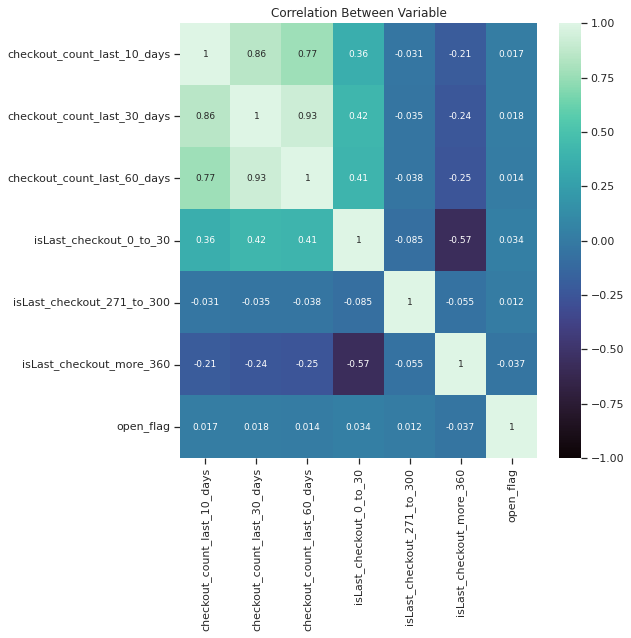

In [52]:
Xy = df_checkout.iloc[:,col_sig+[16]]
corr_user = Xy.corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')
sns.heatmap(corr_user, annot=True, vmin=-1, vmax=1, cmap='mako', annot_kws={"fontsize":9})
plt.show()

In [53]:
Xy.drop(columns=['checkout_count_last_10_days', 'checkout_count_last_60_days', 'isLast_checkout_0_to_30'], inplace=True)
X = Xy.iloc[:,:-1]
y = Xy.iloc[:,-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
checkout_summary = []
col_X = X.columns.tolist()
for c in col_X:
  (r, p_value) = stats.pearsonr(X[c], y)
  checkout_summary.append([c, round(r,3), round(p_value,3)])
checkout_summary = pd.DataFrame(checkout_summary, columns=['column', 'correlation', 'pvalue'])
checkout_summary

,column,correlation,pvalue
0,checkout_count_last_30_days,0.018,0.000
1,isLast_checkout_271_to_300,0.012,0.006
2,isLast_checkout_more_360,-0.037,0.000


We found **3 important features** about user checkout activity.

<a name='section_3_b'></a>
### **Classification - Logistic Regression**

We combine all important features we've found before.

In [55]:
col_all = pd.concat([user_summary, open_summary, summary_login, checkout_summary])
df_all = pd.concat([df_user, df_open, df_login, df_checkout], axis=1)
col_names = col_all['column'].values
df_all = df_all[col_names]
df_all['open_flag'] = df_user['open_flag']

And eliminate features that have highly correalted to each other.

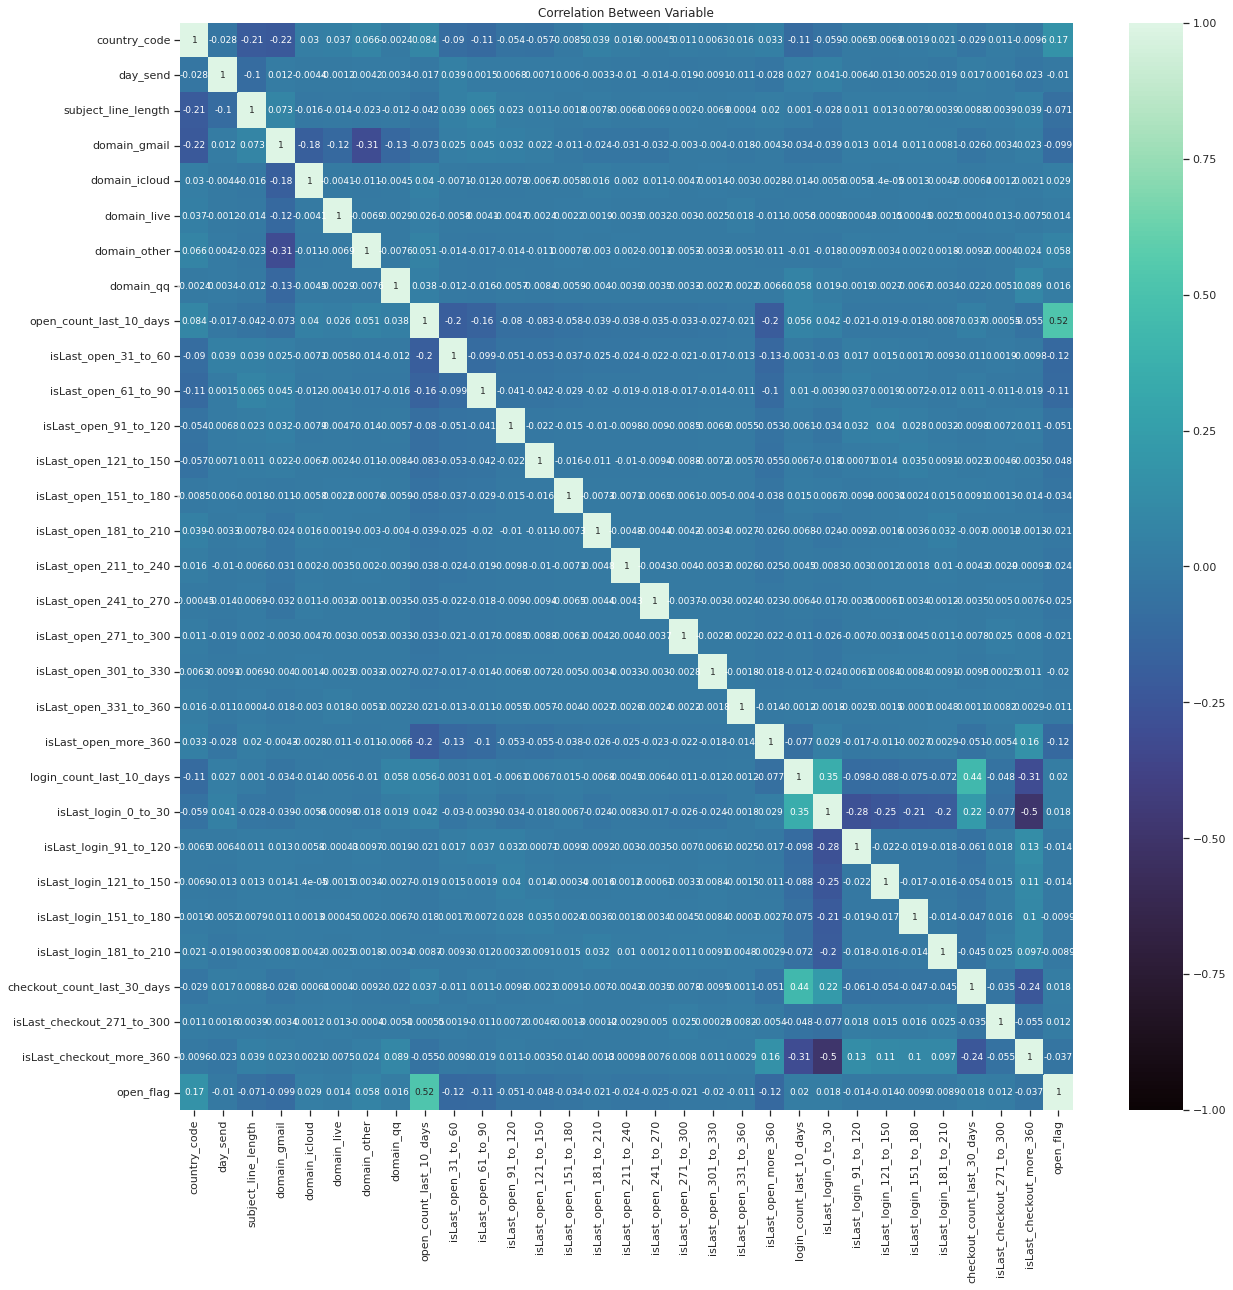

In [56]:
Xy = df_all
corr_user = Xy.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')
sns.heatmap(corr_user, annot=True, vmin=-1, vmax=1, cmap='mako', annot_kws={"fontsize":9})
plt.show()

We eliminate isLast_login_0_to_30 feature because it's highly correlated to isLast_checkout_more_360 feature.

In [57]:
Xy.drop(columns=['isLast_login_0_to_30'], inplace=True)
X = Xy.iloc[:,:-1]
y = Xy.iloc[:,-1]

In [58]:
summary = []
col_X = X.columns.tolist()
for c in col_X:
  (r, p_value) = stats.pearsonr(X[c], y)
  summary.append([c, abs(round(r,3)), round(p_value,3)])
summary = pd.DataFrame(summary, columns=['column', 'correlation', 'pvalue']).sort_values('correlation', ascending=False)
summary

,column,correlation,pvalue
8,open_count_last_10_days,0.525,0.000
0,country_code,0.172,0.000
20,isLast_open_more_360,0.121,0.000
9,isLast_open_31_to_60,0.120,0.000
10,isLast_open_61_to_90,0.110,0.000
3,domain_gmail,0.099,0.000
2,subject_line_length,0.071,0.000
6,domain_other,0.058,0.000
11,isLast_open_91_to_120,0.051,0.000
12,isLast_open_121_to_150,0.048,0.000


Finally, we found 29 most important features above. We decided to take only the Top 6 Features to enter the classification.

In [59]:
col_X =summary.iloc[:6, 0].values
X = Xy[col_X]
y = Xy.iloc[:,-1]

In [60]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
model = LogisticRegression().fit(X, y)

In [61]:
A = pd.DataFrame(model.predict_proba(X))
limit = range(0, 1000, 10)
best_thres = []

for l in limit:
  lim = l/1000
  y_pred = (A[1]>lim)*1
  matrix = confusion_matrix(y, y_pred)

  n_lost_pot_cus = matrix[1,0]
  n_open = matrix[1,1]
  n_not_send = matrix[0,0]+matrix[1,0]
  n_send = matrix[0,1]+matrix[1,1]
  
  cost_reduced = round((n_not_send / (n_send+n_not_send) * 100), 2)
  lost_pot_cust = round((n_lost_pot_cus / (n_open+n_lost_pot_cus) * 100), 2)
  open_rate = round((n_open / n_send * 100), 2)
  best_thres.append([lim, n_lost_pot_cus, n_open, n_not_send, n_send,
                     cost_reduced, lost_pot_cust, open_rate])

df_thres = pd.DataFrame(best_thres, columns=['lim_thres', 'n_lost_pot_cus', 'n_open', 'n_not_send', 'n_send',
                                             'cost_reduced', 'lost_pot_cust', 'open_rate'])
df_thres

,lim_thres,n_lost_pot_cus,n_open,n_not_send,n_send,cost_reduced,lost_pot_cust,open_rate
0,0.00,0,8398,0,50285,0.00,0.00,16.70
1,0.01,0,8398,0,50285,0.00,0.00,16.70
2,0.02,42,8356,2917,47368,5.80,0.50,17.64
3,0.03,157,8241,7475,42810,14.87,1.87,19.25
4,0.04,239,8159,9827,40458,19.54,2.85,20.17
...,...,...,...,...,...,...,...,...
95,0.95,8048,350,49880,405,99.19,95.83,86.42
96,0.96,8181,217,50038,247,99.51,97.42,87.85
97,0.97,8213,185,50076,209,99.58,97.80,88.52
98,0.98,8315,83,50189,96,99.81,99.01,86.46


In [ ]:
from google.colab import files

df_thres.to_csv('Threshold_data.csv', encoding = 'utf-8-sig') 
files.download('Threshold_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
data_clean = Xy.copy()
data_clean['Date'] = df_train_clean['grass_date']
data_clean['Proba'] = A[1].values
data_clean.head()

,country_code,day_send,subject_line_length,domain_gmail,domain_icloud,domain_live,domain_other,domain_qq,open_count_last_10_days,isLast_open_31_to_60,...,isLast_login_91_to_120,isLast_login_121_to_150,isLast_login_151_to_180,isLast_login_181_to_210,checkout_count_last_30_days,isLast_checkout_271_to_300,isLast_checkout_more_360,open_flag,Date,Proba
0,3,1,31,1,0,0,0,0,1,0,...,0,0,0,0,8,0,0,0,2019-07-15 16:00:00+00:00,0.146053
1,5,1,32,1,0,0,0,0,4,0,...,0,0,0,0,16,0,0,1,2019-07-15 16:00:00+00:00,0.626642
3,3,1,33,1,0,0,0,0,0,0,...,0,0,0,0,12,0,0,1,2019-07-15 16:00:00+00:00,0.041208
5,3,1,36,1,0,0,0,0,0,1,...,0,0,0,0,11,0,0,0,2019-07-15 16:00:00+00:00,0.042657
7,1,1,38,1,0,0,0,0,0,1,...,0,0,0,0,17,0,0,0,2019-07-15 16:00:00+00:00,0.025963


In [ ]:
data_clean.to_csv('Data_clean_all_2.csv', encoding = 'utf-8-sig') 
files.download('Data_clean_all_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
summary_2 = summary.reset_index().drop(columns='index')
summary_2

,column,correlation,pvalue
0,open_count_last_10_days,0.525,0.000
1,country_code,0.172,0.000
2,isLast_open_more_360,0.121,0.000
3,isLast_open_31_to_60,0.120,0.000
4,isLast_open_61_to_90,0.110,0.000
5,domain_gmail,0.099,0.000
6,subject_line_length,0.071,0.000
7,domain_other,0.058,0.000
8,isLast_open_91_to_120,0.051,0.000
9,isLast_open_121_to_150,0.048,0.000


In [ ]:
summary_2.to_csv('Correlation.csv', encoding = 'utf-8-sig') 
files.download('Correlation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>